# Question 1 

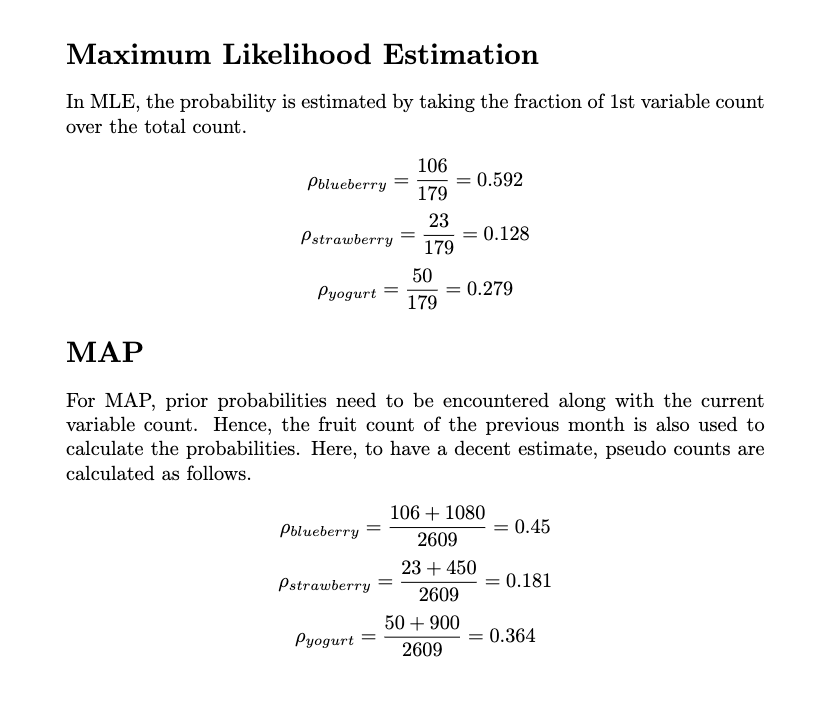

# Question 2

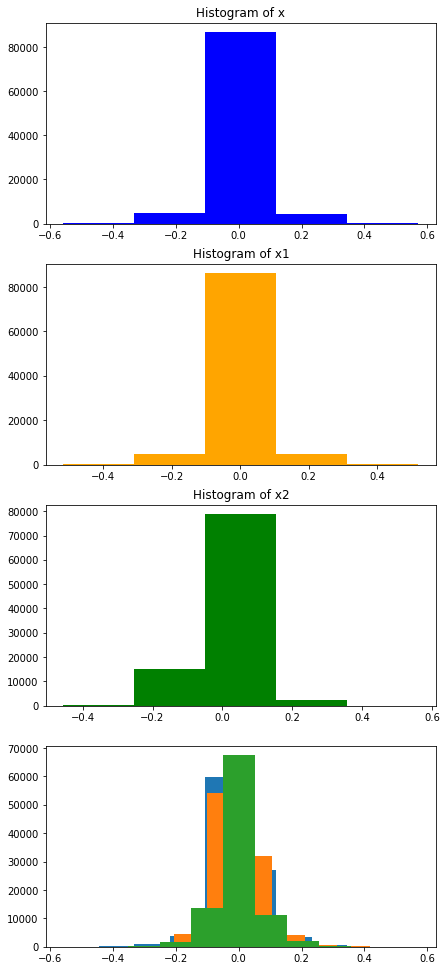

Kurtosis of original signal is:  7.293443165878747
Kurtosis of signal 1 is:  4.907141280066497
Kurtosis of signal 2 is:  3.873327835212219


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa


def my_kurtosis(x):
    fourth_powers = np.power(x, 4)
    fourth_moment = np.sum(fourth_powers) / len(x)
    kurtosis = fourth_moment - 3
    return kurtosis


if __name__ == "__main__":
    x, sr = librosa.load('/home/s.wav', sr=None)
    x1, sr1 = librosa.load('/home/x1.wav', sr=None)
    x2, sr2 = librosa.load('/home/x2.wav', sr=None)

    fig, axs = plt.subplots(4, 1, figsize=(7, 17))

    axs[0].hist(x, bins=5, color='blue')
    axs[1].hist(x1, bins=5, color='orange')
    axs[2].hist(x2, bins=5, color='green')
    axs[3].hist(x)

    axs[0].set_title('Histogram of x')
    axs[1].set_title('Histogram of x1')
    axs[2].set_title('Histogram of x2')

    plt.hist(x1)
    plt.hist(x2)
    plt.show()

    standardized_x = (x - np.mean(x)) / np.std(x)
    standardized_x1 = (x1 - np.mean(x1)) / np.std(x1)
    standardized_x2 = (x2 - np.mean(x2)) / np.std(x2)

    my_kurt = my_kurtosis(standardized_x)
    my_kurt1 = my_kurtosis(standardized_x1)
    my_kurt2 = my_kurtosis(standardized_x2)

    print("Kurtosis of original signal is: ", my_kurt)
    print("Kurtosis of signal 1 is: ", my_kurt1)
    print("Kurtosis of signal 2 is: ", my_kurt2)


Explanation:

The signal with more random sources is the one which is close to the guassian distribution. Moreover, a non-guassian metric Kurtosis compares the two non-guassian distributed data. A distribution with higher Kurtosis value has more data in the tail than a normal distribution and vice versa.

In our example, signal 2 has the least Kurtosis value hence closet to the guassian distribution compared to the other signal 1. So, we can say that signal 2 has more sources than signal 1. 

This is clear in the histograms as well. Histogram of signal 1 is almost similar to the histogram of clean original signal which implies that signal 1 has the less sources compared to the signal 2. 

# Question 3

<Figure size 360x360 with 0 Axes>

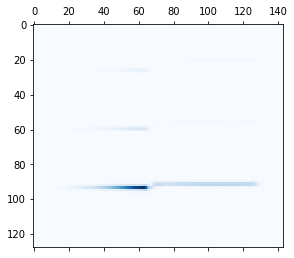

<Figure size 72x36 with 0 Axes>

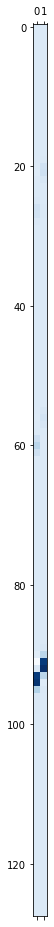

<Figure size 144x36 with 0 Axes>

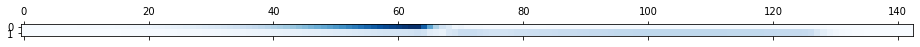

<Figure size 360x360 with 0 Axes>

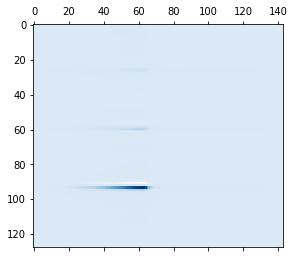

In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat


def power_iteration(A, num_sim):
    x = np.random.rand(A.shape[1])

    for _ in range(num_sim):
        x1 = np.dot(A, x)
        x1_norm = np.linalg.norm(x1)
        x = x1 / x1_norm

    return x, x1_norm


if __name__ == "__main__":
    file = loadmat('/home/flute.mat')
    X = file["X"]

    c = np.cov(X, bias=True)

    eigenvector1, eigenvalue1 = power_iteration(c, 100)
    c1 = c - eigenvalue1 * np.outer(eigenvector1, eigenvector1)
    eigenvector2, eigenvalue2 = power_iteration(c1, 100)

    eigenvector1 = eigenvector1.reshape(-1, 1)
    eigenvector2 = eigenvector2.reshape(-1, 1)

    EV = np.column_stack((eigenvector1, eigenvector2))
    EVt = np.transpose(EV)

    transition_matrix = np.matmul(EVt, X)
    transition1 = transition_matrix[0].reshape(1, -1)
    source1 = np.matmul(eigenvector1, transition1)

    plt.figure(figsize=(5, 5))
    plt.matshow(X, cmap=plt.cm.Blues)

    plt.figure(figsize=(1, 0.5))
    plt.matshow(EV, cmap=plt.cm.Blues)

    plt.figure(figsize=(2, 0.5))
    plt.matshow(transition_matrix, cmap=plt.cm.Blues)

    plt.figure(figsize=(5,5))
    plt.matshow(source1, cmap=plt.cm.Blues)

    plt.show


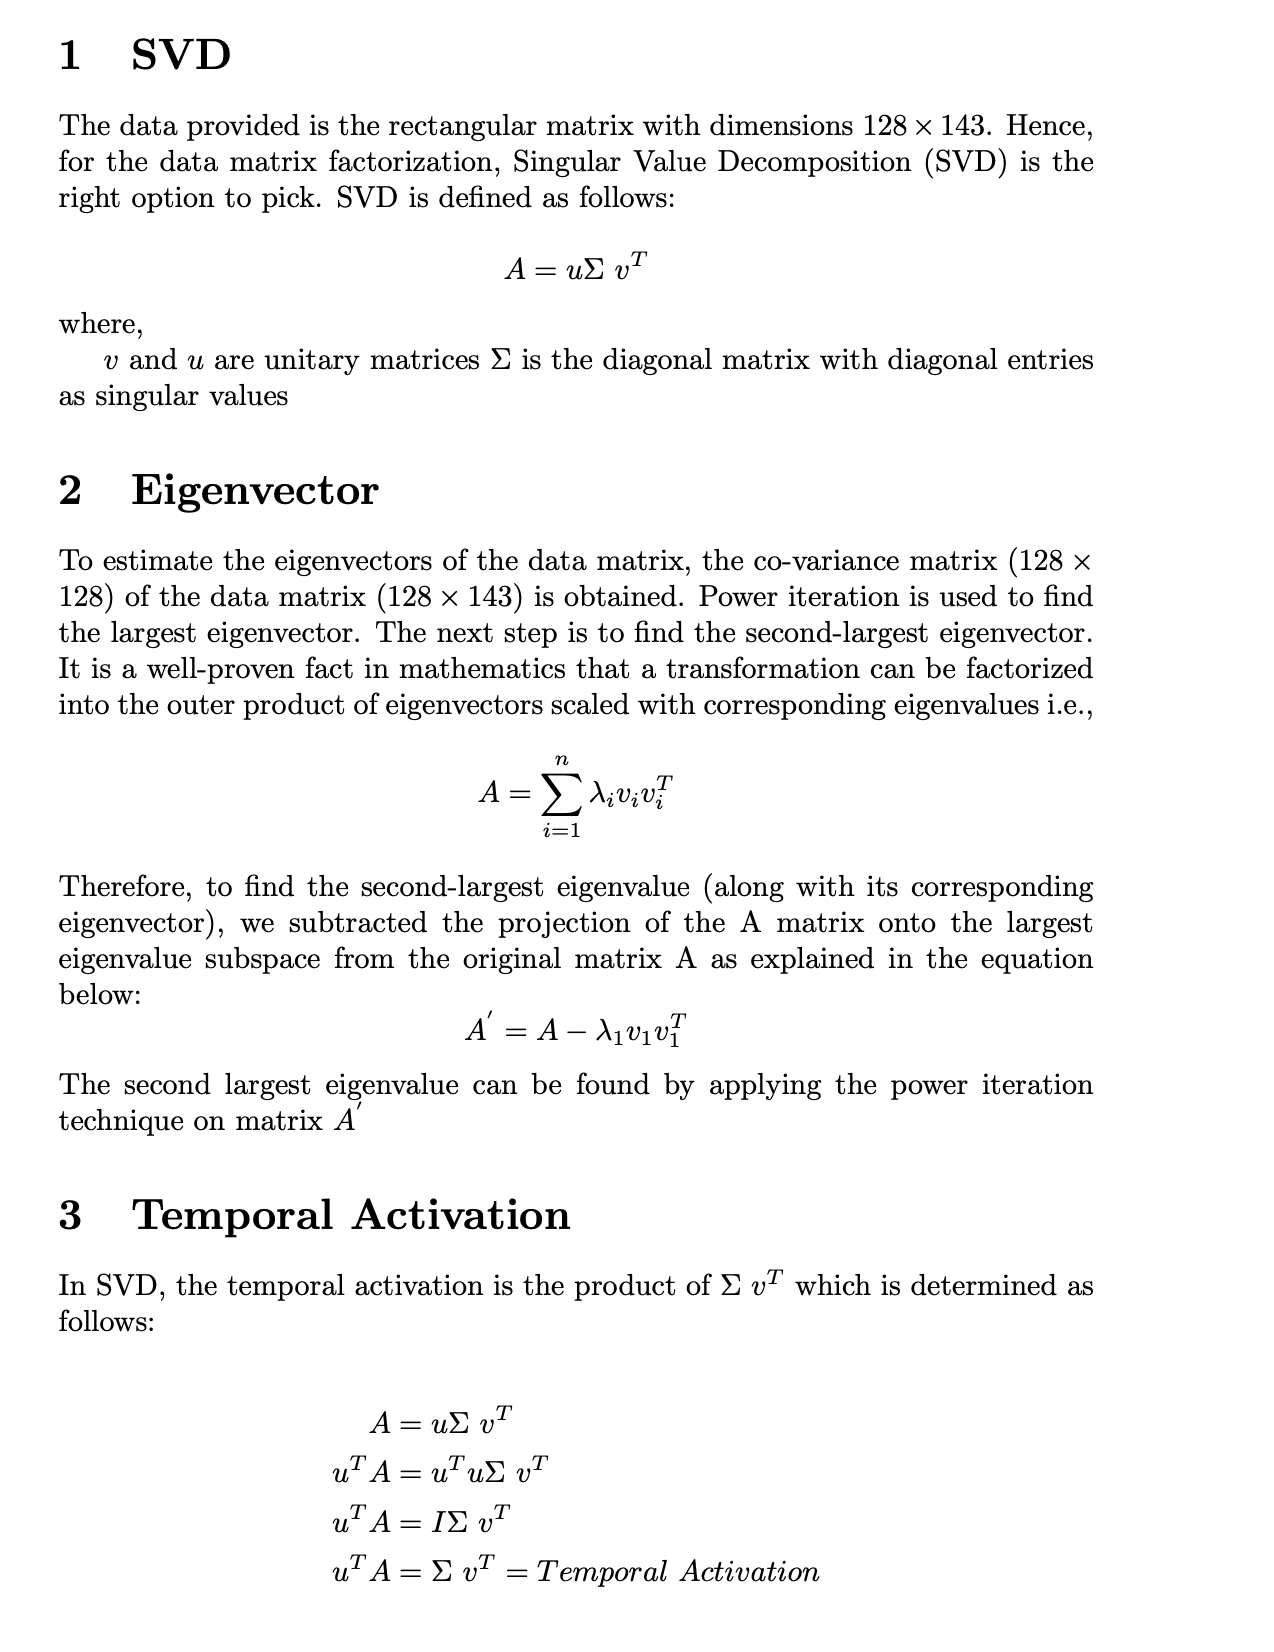

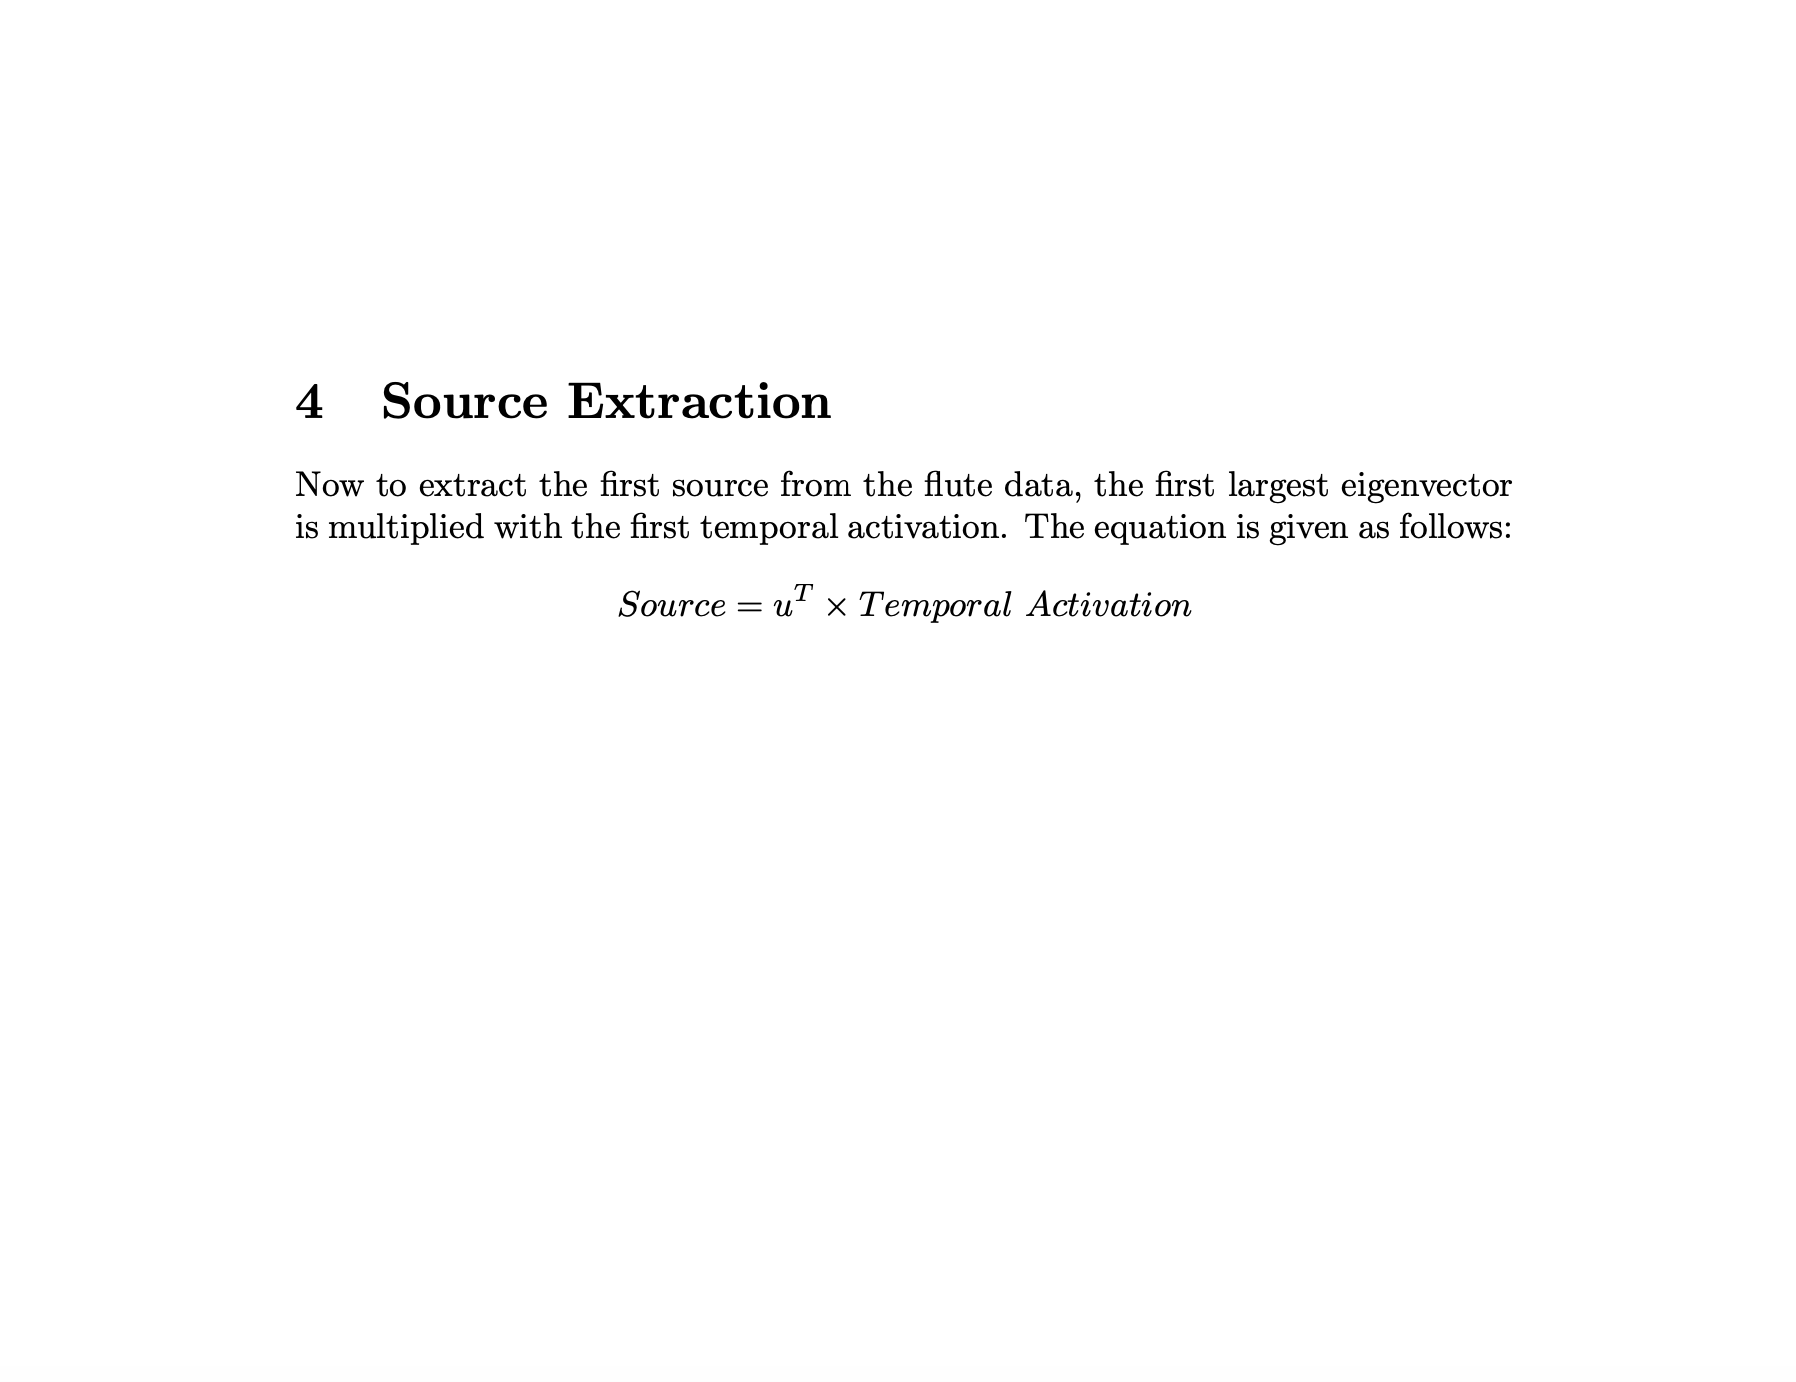

# Question 4 - Gradient Descent Algorithm

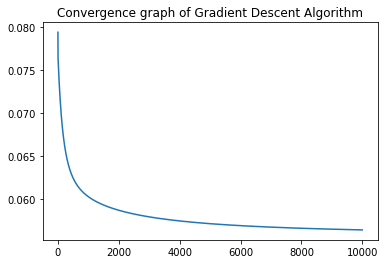

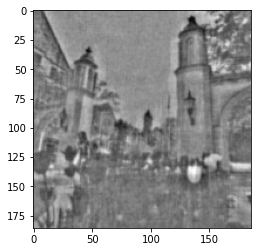

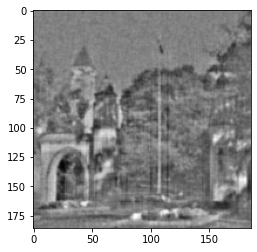

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def logistic_function(x):
    return 1 / (1 + np.exp(-x))


def differential_logistic(x):
    temp = logistic_function(x)
    return temp * (1 - temp)


def matrix_flattening(matrix):
    num_row = len(matrix)
    num_col = len(matrix[0])
    flat = []
    for col in range(0, num_col):
        for row in range(0, num_row):
            flat = flat + [matrix[row][col]]
    return flat


def X_matrix(in_img):
    X = []
    num_row = len(in_img)
    num_col = len(in_img[0])
    for row in range(0, num_row - f_size + 1):  # - (num_row - f_size - 1)
        for col in range(0, num_col - f_size + 1):
            X = X + [matrix_flattening(in_img[row:row + f_size, col:col + f_size])]

    return np.transpose(X)


def gradient_descent(f, X, st):
    fTX = np.matmul(np.transpose(f), X)

    gfTX = logistic_function(fTX)
    gfTX1 = differential_logistic(fTX)
    gradient = np.multiply(st - gfTX, gfTX1)
    gradient = np.transpose(gradient)
    gradient = np.matmul(X, gradient)
    gradient = -(2 / N) * gradient

    e1 = st - gfTX
    MSE = np.matmul(e1, np.transpose(e1))
    MSE = MSE / N
    return gradient, MSE


if __name__ == "__main__":
    in_img = plt.imread('/home/sgx_train.jpg')
    label_img = plt.imread('/home/sg_train.jpg')
    test_img = plt.imread('/home/sgx_test.jpg')
    f_size = 15
    l_rate = 0.1
    N = 34596
    num_iter = 10000
    MSE = np.array([])

    label_img = label_img[7:-7, 7:-7]
    st = label_img.reshape(1, -1)
    st = st / 255
    s = np.transpose(st)
    X = X_matrix(in_img / 255)

    Test = X_matrix(test_img / 255)

    f_matrix = np.random.rand(f_size, f_size) * 0.01
    f = matrix_flattening(f_matrix)
    f = np.reshape(f, (225, 1))

    old_f = f

    for i in range(0, num_iter):
        gradient, MSEi = gradient_descent(old_f, X, st)
        new_f = old_f - l_rate * gradient
        old_f = new_f
        MSE = np.append(MSE, MSEi)

    x = np.arange(1, num_iter + 1)
    plt.plot(x, MSE)
    plt.title("Convergence graph of Gradient Descent Algorithm")
    plt.show()

    fTX = np.matmul(np.transpose(old_f), X)
    fTX = fTX.reshape(186, 186)
    plt.imshow(fTX, cmap='gray')
    plt.show()
    
    ftX1 = np.matmul(np.transpose(old_f), Test)
    fTX1 = ftX1.reshape(186, 186)
    plt.imshow(fTX1, cmap='gray')
    plt.savefig("test_denoised_image.png")
    




# Question 4 - BFGS Algorithm

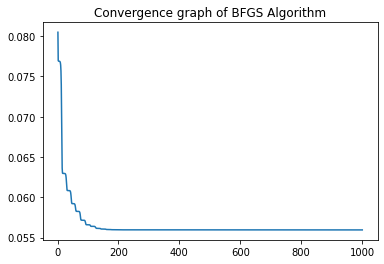

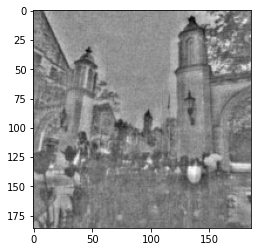

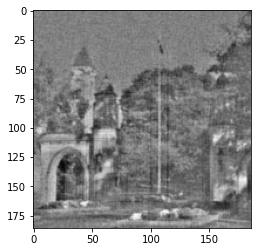

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import line_search


def logistic_function(x):
    return 1 / (1 + np.exp(-x))


def differential_logistic(x):
    temp = logistic_function(x)
    return temp * (1 - temp)


def matrix_flattening(matrix):
    num_row = len(matrix)
    num_col = len(matrix[0])
    flat = []
    for col in range(0, num_col):
        for row in range(0, num_row):
            flat = flat + [matrix[row][col]]
    return flat


def X_matrix(in_img):
    X = []
    num_row = len(in_img)
    num_col = len(in_img[0])
    for row in range(0, num_row - f_size + 1):  # - (num_row - f_size - 1)
        for col in range(0, num_col - f_size + 1):
            X = X + [matrix_flattening(in_img[row:row + f_size, col:col + f_size])]

    return np.transpose(X)


def gradient_descent(f, X, st):
    fTX = np.matmul(np.transpose(f), X)
    gfTX = logistic_function(fTX)
    gfTX1 = differential_logistic(fTX)
    gradient = np.multiply(st - gfTX, gfTX1)
    gradient = np.transpose(gradient)
    gradient = np.matmul(X, gradient)
    gradient = -(2 / N) * gradient

    e1 = st - gfTX
    MSE = np.matmul(e1, np.transpose(e1))
    MSE = MSE / N
    return gradient, MSE

def BFGS(Hi,bfgs_fi1,bfgs_fi,delta_fi,delta_fi1):

    p = bfgs_fi1 - bfgs_fi
    v = delta_fi1 - delta_fi

    u1d = np.dot(np.transpose(p),v)
    u2n = np.dot(Hi,v)
    u2d = np.dot(np.transpose(v),u2n)
    u1 = p/u1d
    u2 = u2n/u2d
    u = u1 - u2

    H1 = np.dot(p,np.transpose(p)) / u1d
    H21 = np.dot(np.transpose(v),Hi)
    H2 = np.dot(np.dot(Hi, v), H21) / u2d
    H31 = np.dot(u,np.transpose(u))
    H3 = u2d * H31

    Hi1 = Hi + H1 - H2 + H3

    return Hi1


if __name__ == "__main__":
    in_img = plt.imread('/home/sgx_train.jpg')
    label_img = plt.imread('/home/sg_train.jpg')
    test_img = plt.imread('/home/sgx_test.jpg')
    f_size = 15
    l_rate = 0.01
    N = 34596
    num_iter = 1000
    MSE = np.array([])

    label_img = label_img[7:-7, 7:-7]
    st = label_img.reshape(1, -1)
    st = st / 255
    s = np.transpose(st)
    X = X_matrix(in_img / 255)

    Test = X_matrix(test_img / 255)

    f_matrix = np.random.rand(f_size, f_size) * 0.01
    f = matrix_flattening(f_matrix)
    f = np.reshape(f, (225, 1))

    bfgs_fi = f
    Hi = np.eye(bfgs_fi.shape[0]) / 1000
    delta_fi = gradient_descent(bfgs_fi, X, st)
    delta_fi = delta_fi[0]
    bfgs_fi1 = bfgs_fi - np.matmul(Hi, delta_fi)
    delta_fi1 = gradient_descent(bfgs_fi1, X, st)
    MSE = np.append(MSE, delta_fi1[1])
    delta_fi1 = delta_fi1[0]

    for i in range(0, num_iter):
        Hi1 = BFGS(Hi,bfgs_fi1,bfgs_fi,delta_fi,delta_fi1)
        Hi = Hi1
        bfgs_fi = bfgs_fi1
        delta_fi = delta_fi1
        bfgs_fi1 = bfgs_fi - np.matmul(Hi, delta_fi)
        delta_fi1 = gradient_descent(bfgs_fi1, X, st)
        MSEi = delta_fi1[1]

        delta_fi1 = delta_fi1[0]

        MSE = np.append(MSE, MSEi)

    x = np.arange(1, num_iter + 2)
    plt.plot(x, MSE)
    plt.title("Convergence graph of BFGS Algorithm")
    plt.show()

    fTX = np.matmul(np.transpose(bfgs_fi1), X)
    fTX = fTX.reshape(186, 186)
    plt.imshow(fTX, cmap='gray')
    plt.show()

    # plt.savefig("denoised_image.png")

    ftX1 = np.matmul(np.transpose(bfgs_fi1), Test)
    fTX1 = ftX1.reshape(186, 186)
    plt.imshow(fTX1, cmap='gray')
    plt.show()
    # plt.savefig("test_denoised_image.png")


Explanation:

The two implemented algorithms; gradient descent and BFGS; have removed the noise but the BFGS converges before the Gradient descent as expected. 

If you notice the convergence graphs of both algorithms, with the same intialization vector, gradient descent is converging at around 1000 iterations howerver, the BFGS is converging at around 200 iterations. This illustrates the power of BFGS over the gradient descent Algorithm.

I have observed the blurriness in the processed image. I would like to discuss it later that the cause of blurred effect and the ways to remove it. 